# **Análisis de Datos de Energía Global (2000 - 2024)**

**Autor:** Juan Manuel Martínez Estrada
**Fecha de creación:** 2025-04-19
**Versión:** 1.0

---
*Este notebook analiza las tendencias globales en el consumo de energía, la adopción de energías renovables, las emisiones de carbono y otros factores relacionados, utilizando datos a nivel de país desde el año 2000 hasta 2024.*

---

## 1. Configuación Incial

#### 1.1. Importación de Librerías

In [1]:
# Análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

# Añadir la carpeta raíz del proyecto a sys.path
sys.path.append(os.path.abspath('..'))
import src.visualizaciones as viz

#### 1.2. Configuraciones Globales

In [2]:
# --- Configuración Visual (Recomendado) ---
pd.set_option('display.max_columns', None) # Para mostrar todas las columnas
pd.set_option('display.float_format', '{:.2f}'.format) # Formato de decimales
sns.set_style('whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = (12, 6) # Tamaño de gráficos por defecto

#### 1.3. Definición de Rutas

In [3]:
import os

# Definiendo el path o ruta hacia el dataset original
data_path = os.path.join('..', 'data', 'dataset_original', 'global_energy_consumption.csv')

# Definiendo el path o ruta hacia el dataset procesado
# data_processed_path = os.path.join('..', 'data', 'dataset_limpio', 'global_energy_consumption_clean.csv')



#### 1.4. Carga de Datos Crudos

In [4]:
# Convirtiendo el dataset en un dataframe de pandas
df = pd.read_csv(data_path)

# Creando una copia del dataframe original
df_copy = df.copy()

## 2. Exploración Inicial de Datos (EDA)

#### 2.1. Visión General del Dataset

In [5]:
# Dimensiones del dataset
print("Dimensiones del dataset: ", df.shape)

Dimensiones del dataset:  (10000, 10)


In [6]:
# Ver las primeras filas
df.head(10)

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48
5,UK,2016,4682.02,2491.92,40.47,69.06,20.07,23.39,2242.11,0.35
6,India,2024,9893.64,3912.56,27.07,31.70,57.59,18.56,3626.50,0.13
7,Canada,2008,7719.04,35819.59,15.03,62.73,57.93,21.51,3808.66,0.05
8,Russia,2020,9624.55,1708.80,77.36,63.39,48.42,24.01,525.95,0.20
9,Brazil,2008,7818.38,29198.37,79.59,25.95,36.93,27.93,2504.76,0.11


In [7]:
df.tail(10)

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
9990,Russia,2007,1810.04,24458.92,60.44,33.84,21.25,17.39,1912.59,0.28
9991,Germany,2023,753.46,23248.14,20.13,52.28,55.68,31.25,2537.40,0.19
9992,Canada,2000,8011.53,34726.50,74.39,59.86,37.91,26.98,2957.43,0.35
9993,Germany,2002,1658.77,631.72,68.79,40.13,27.11,22.11,3725.05,0.28
9994,Brazil,2004,1946.42,29544.63,52.69,23.54,29.57,11.56,167.00,0.23
9995,Canada,2017,9786.50,30481.07,14.87,70.25,53.93,19.94,620.85,0.29
9996,UK,2011,7200.88,37402.75,89.00,16.55,24.35,20.57,830.73,0.48
9997,India,2011,2579.82,44516.91,46.65,68.06,57.01,33.73,993.78,0.08
9998,UK,2020,5950.39,22289.39,43.43,68.57,34.94,25.40,199.85,0.47
9999,Brazil,2018,5387.71,17454.75,89.62,49.97,30.04,37.96,4606.33,0.11


In [8]:
# Información básica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          10000 non-null  object 
 1   Year                             10000 non-null  int64  
 2   Total Energy Consumption (TWh)   10000 non-null  float64
 3   Per Capita Energy Use (kWh)      10000 non-null  float64
 4   Renewable Energy Share (%)       10000 non-null  float64
 5   Fossil Fuel Dependency (%)       10000 non-null  float64
 6   Industrial Energy Use (%)        10000 non-null  float64
 7   Household Energy Use (%)         10000 non-null  float64
 8   Carbon Emissions (Million Tons)  10000 non-null  float64
 9   Energy Price Index (USD/kWh)     10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB


In [9]:
# Resumen estadístico
df.describe()

,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,2012.15,5142.56,25039.95,47.32,44.93,40.06,25.04,2536.15,0.27
std,7.16,2848.75,14205.66,24.60,20.20,11.54,8.60,1424.11,0.13
min,2000.00,100.48,500.27,5.00,10.01,20.00,10.00,50.64,0.05
25%,2006.00,2713.88,12683.22,26.11,27.34,30.22,17.61,1293.33,0.16
50%,2012.00,5190.85,25098.77,47.15,45.11,39.98,25.09,2568.01,0.27
75%,2018.00,7579.98,37113.28,68.68,62.43,50.15,32.57,3766.18,0.39
max,2024.00,9999.26,49989.57,90.00,80.00,60.00,40.00,4999.34,0.50


In [10]:
# Verificar valores nulos
df.isna().sum()

Country                            0
Year                               0
Total Energy Consumption (TWh)     0
Per Capita Energy Use (kWh)        0
Renewable Energy Share (%)         0
Fossil Fuel Dependency (%)         0
Industrial Energy Use (%)          0
Household Energy Use (%)           0
Carbon Emissions (Million Tons)    0
Energy Price Index (USD/kWh)       0
dtype: int64

#### 2.2. Análisis de la Estructura Temporal y Geogrpafica

In [11]:
# Distribución de países en el dataset
print(f"Número total de países: {df['Country'].nunique()}\n")
# Paises en el dataset
print(f"Paises en el dataset: {df['Country'].unique()}")

Número total de países: 10

Paises en el dataset: ['Canada' 'Germany' 'Russia' 'Brazil' 'UK' 'India' 'Australia' 'China'
 'USA' 'Japan']


In [12]:
# Distribución por años
años_disponibles = df['Year'].unique()
print(f"\nAños disponibles: {sorted(años_disponibles)}")
print(f"\nPeríodo de tiempo: {min(años_disponibles)} - {max(años_disponibles)}")


Años disponibles: [np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]

Período de tiempo: 2000 - 2024


## 3. Estadística Descriptiva y Distribución de los Datos

#### 3.1. Histograma y KDE plot de `Total Energy Consumption (TWh)`

In [13]:
df = df.sort_values(by = "Year", ascending = True)
df.head(5)

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
8542,Brazil,2000,9263.53,24225.70,45.82,31.36,53.21,20.34,3007.21,0.25
2951,China,2000,5994.95,1708.20,58.72,44.42,55.30,10.02,1352.51,0.44
5307,India,2000,1336.34,48404.72,86.65,79.65,56.81,26.97,2739.25,0.39
9067,Germany,2000,5318.83,24442.64,79.59,51.21,58.70,25.56,1117.72,0.34
2896,UK,2000,328.22,9432.61,10.75,48.48,30.41,10.23,2347.01,0.39


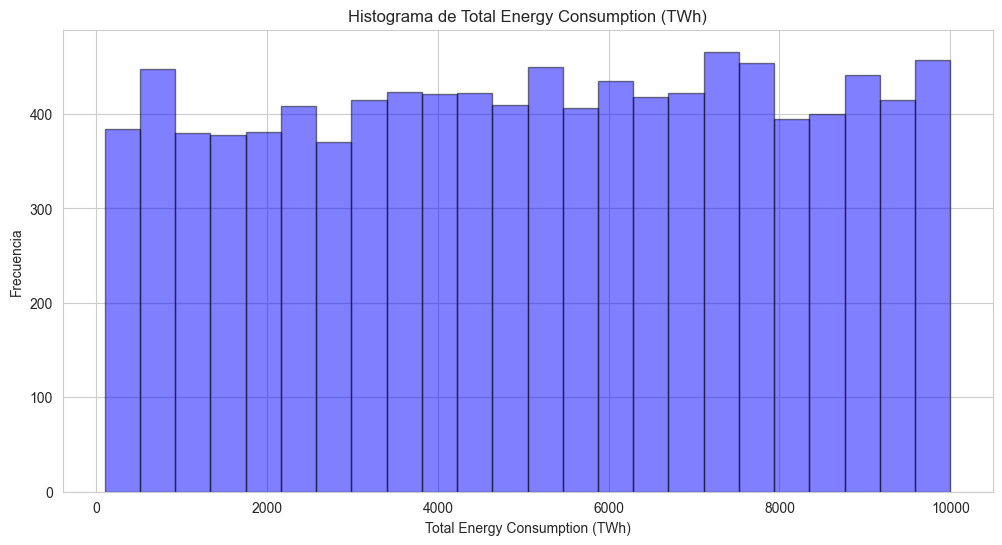

In [14]:
# Histograma de Total Energy Consumption (TWh)
viz.crear_histograma(df, 'Total Energy Consumption (TWh)', 'Total Energy Consumption (TWh)', 'Frecuencia')

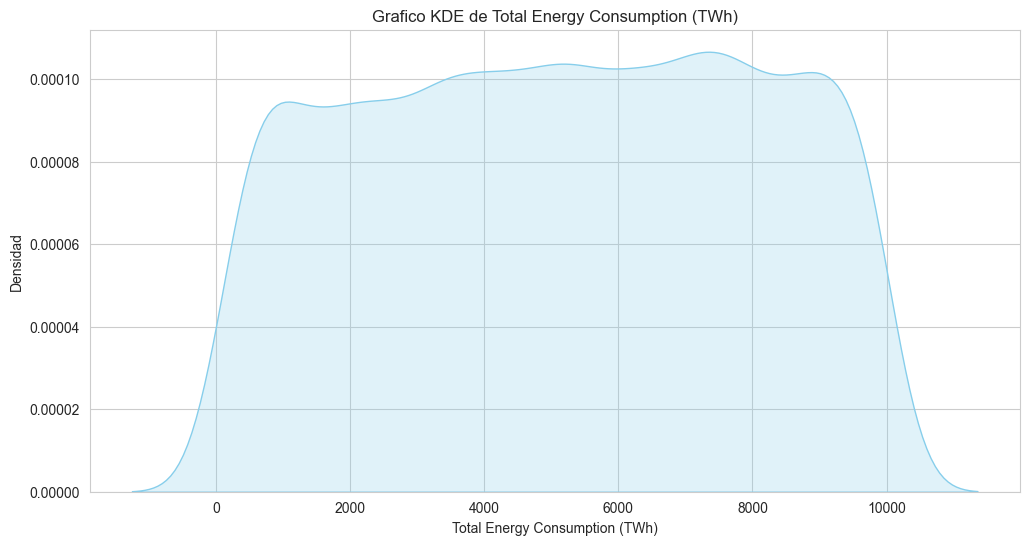

In [15]:
# Gráfico de estimación de densidad de kernel de Total Energy Consumption (TWh)
viz.crear_grafico_kde(df, 'Total Energy Consumption (TWh)', 'Total Energy Consumption (TWh)', 'Densidad')

#### 3.2.  Histograma y KDE plot de `Per Capita Energy Use (kWh)`

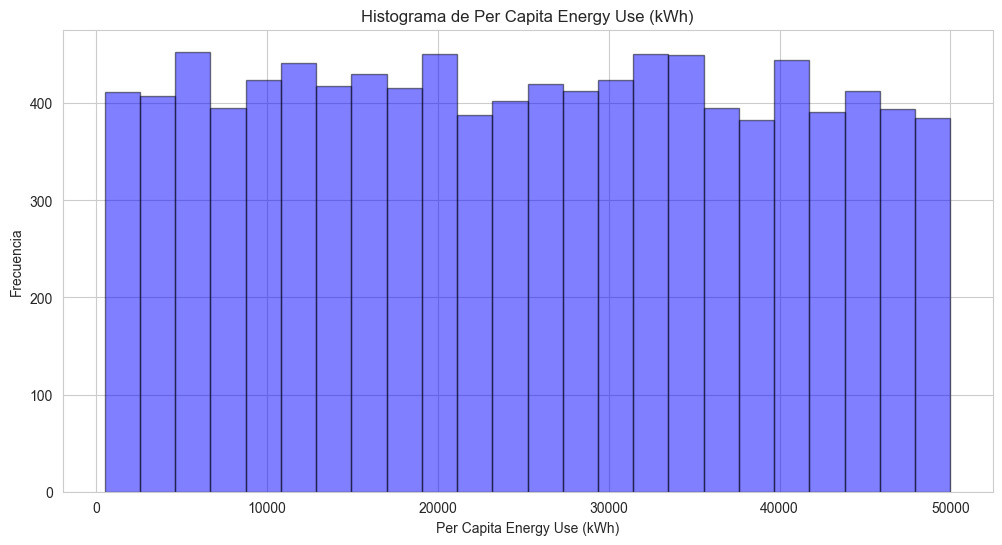

In [16]:
# Histograma de Per Capita Energy Use (kWh)
viz.crear_histograma(df, 'Per Capita Energy Use (kWh)', 'Per Capita Energy Use (kWh)', 'Frecuencia')

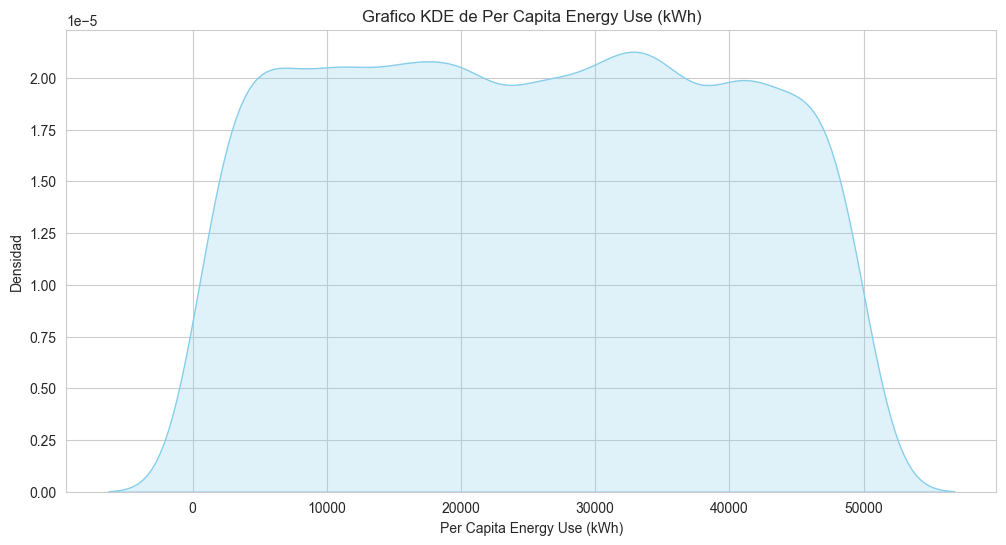

In [17]:
# Gráfico de estimación de densidad de kernel de Per Capita Energy Use (kWh)
viz.crear_grafico_kde(df, 'Per Capita Energy Use (kWh)', 'Per Capita Energy Use (kWh)', 'Densidad')

#### 3.3 Histograma y KDE plot de `Renewable Energy Share (%)`

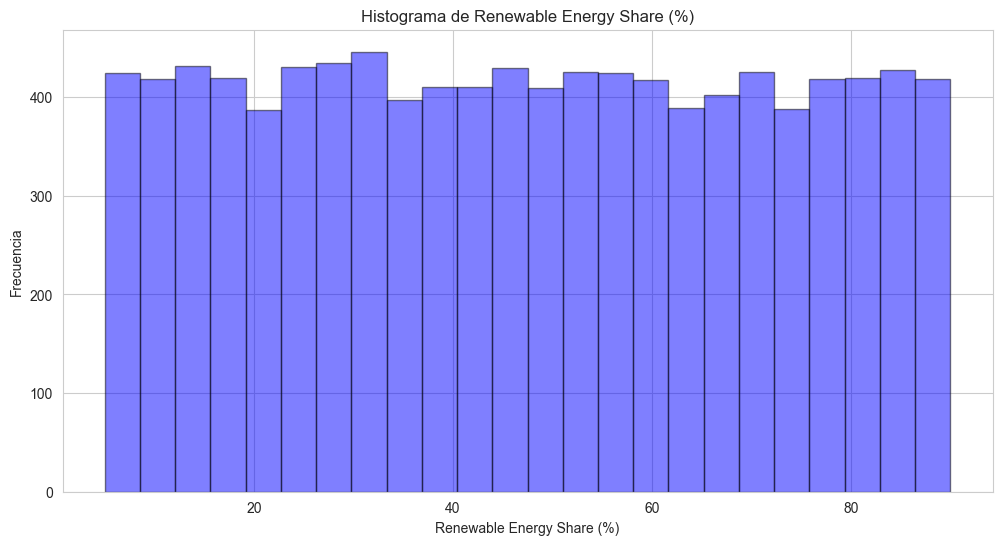

In [18]:
# Histograma de Renewable Energy Share (%)
viz.crear_histograma(df, 'Renewable Energy Share (%)', 'Renewable Energy Share (%)', 'Frecuencia')

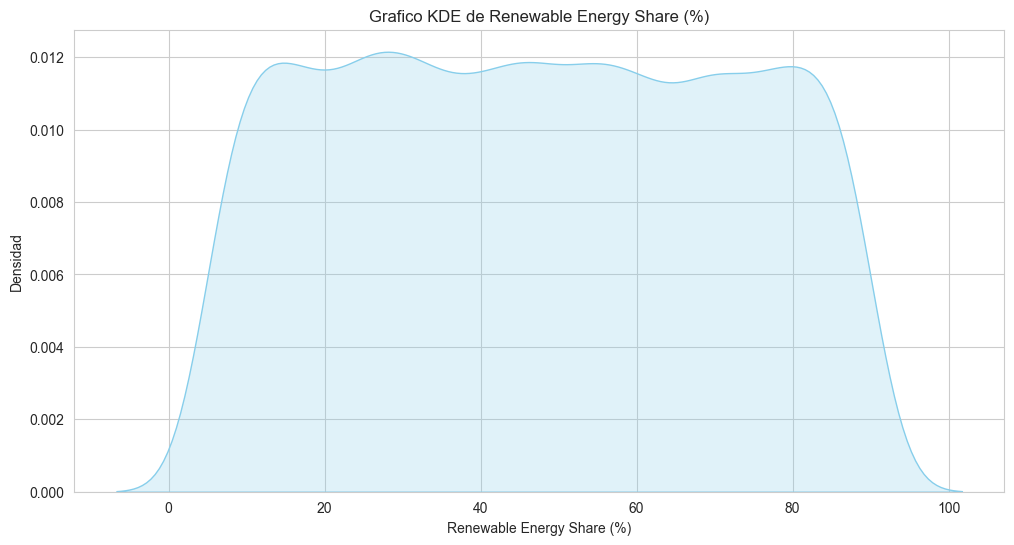

In [19]:
# Gráfico de estimación de densidad de kernel de Renewable Energy Share (%)
viz.crear_grafico_kde(df, 'Renewable Energy Share (%)', 'Renewable Energy Share (%)', 'Densidad')

#### 3.4. Histograma y KDE plot de `Fossil Fuel Dependency (%)`

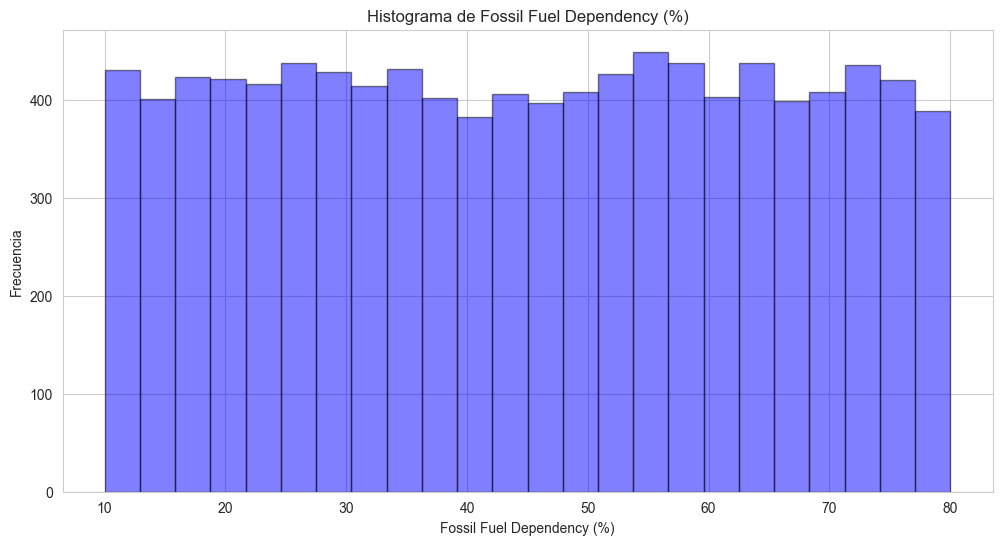

In [20]:
# Histograma de Fossil Fuel Dependency (%)
viz.crear_histograma(df, 'Fossil Fuel Dependency (%)', 'Fossil Fuel Dependency (%)', 'Frecuencia')

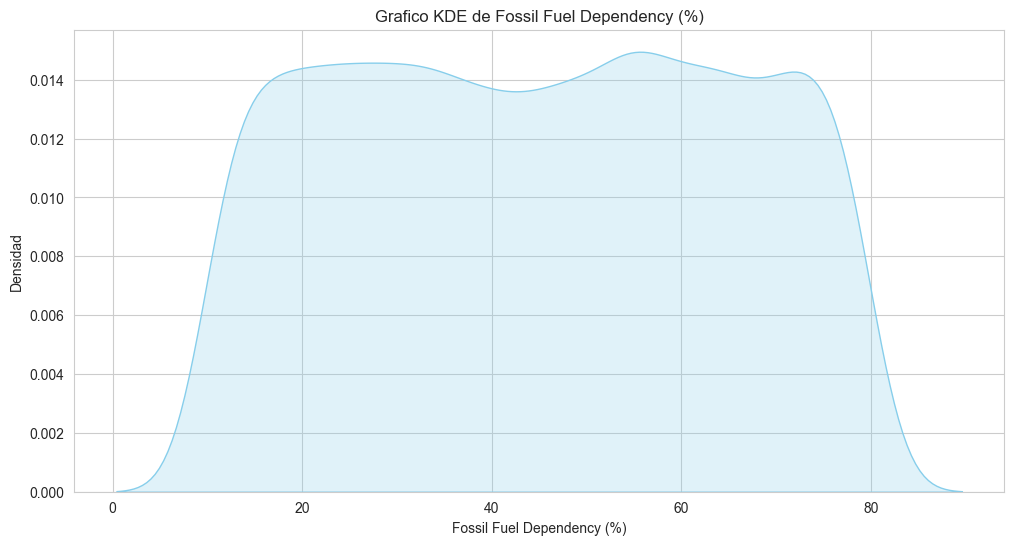

In [21]:
# Gráfico de estimación de densidad de kernel de Fossil Fuel Dependency (%)
viz.crear_grafico_kde(df, 'Fossil Fuel Dependency (%)', 'Fossil Fuel Dependency (%)', 'Densidad')

#### 3.5. Histograma y KDE plot de `Carbon Emissions (Million Tons)`

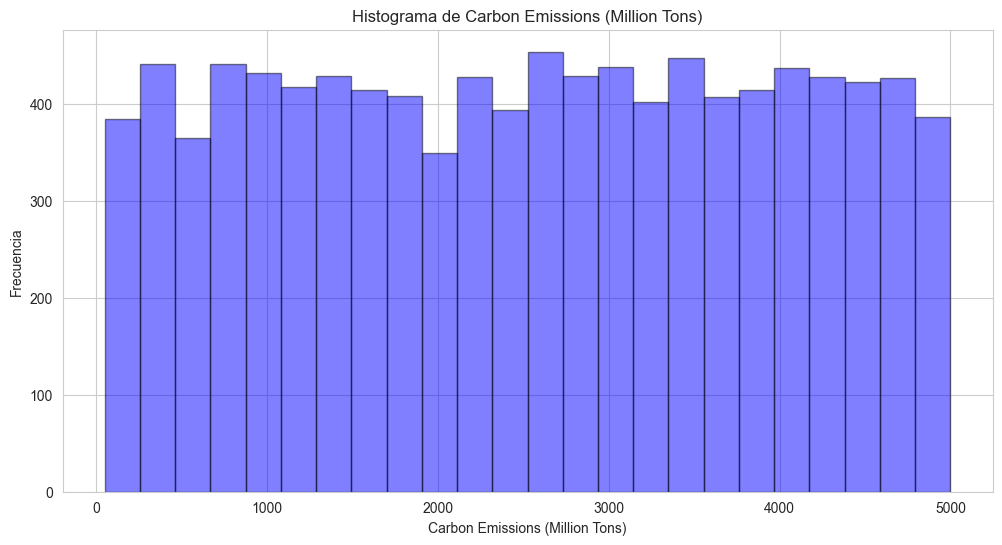

In [22]:
# Histograma de Carbon Emissions (Million Tons)
viz.crear_histograma(df, 'Carbon Emissions (Million Tons)', 'Carbon Emissions (Million Tons)', 'Frecuencia')

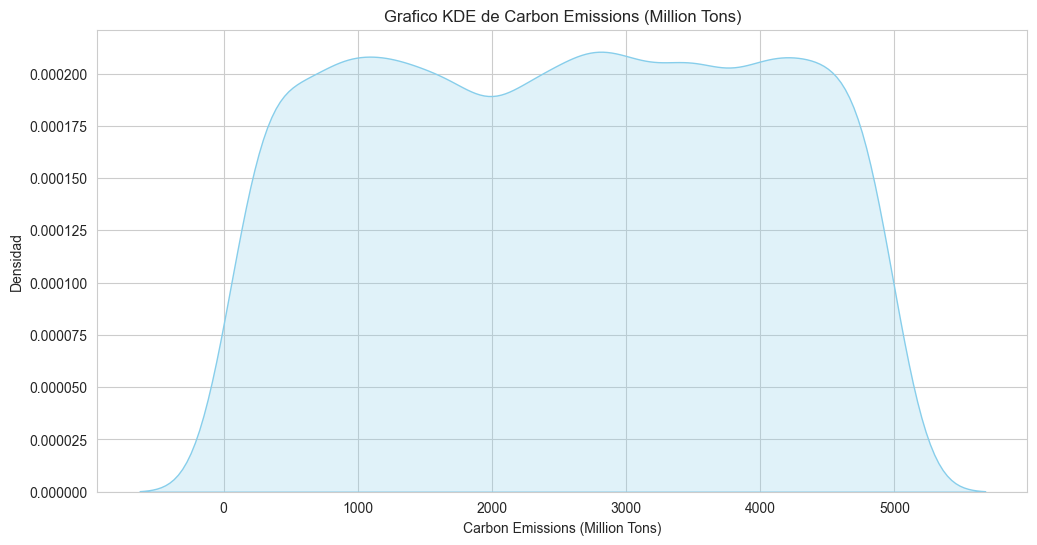

In [23]:
# Gráfico de estimación de densidad de kernel de Fossil Fuel Dependency (%)
viz.crear_grafico_kde(df, 'Carbon Emissions (Million Tons)', 'Carbon Emissions (Million Tons)', 'Densidad')

#### 3.6. Histograma y KDE plot de `Energy Price Index (USD/kWh)`

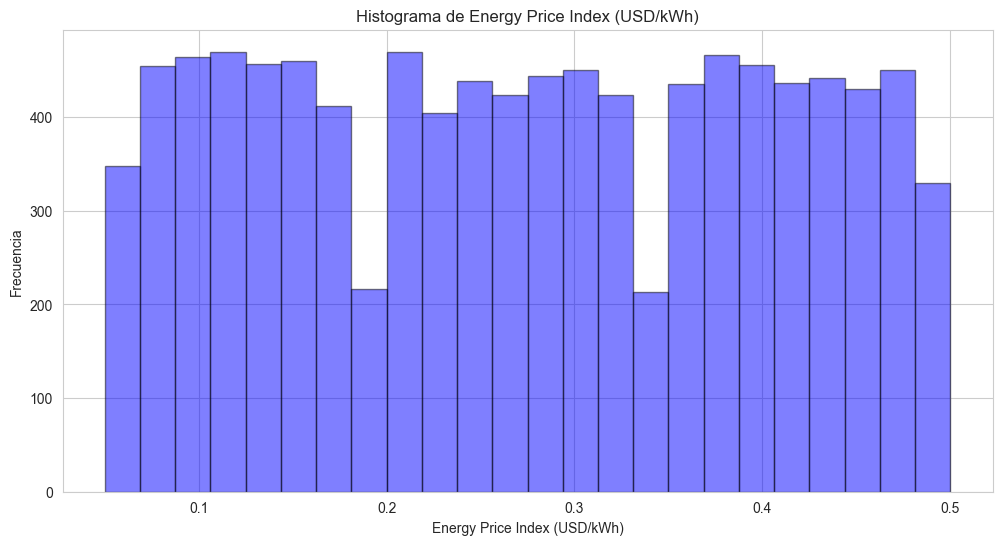

In [24]:
# Histograma de Energy Price Index (USD/kWh)
viz.crear_histograma(df, 'Energy Price Index (USD/kWh)', 'Energy Price Index (USD/kWh)', 'Frecuencia')

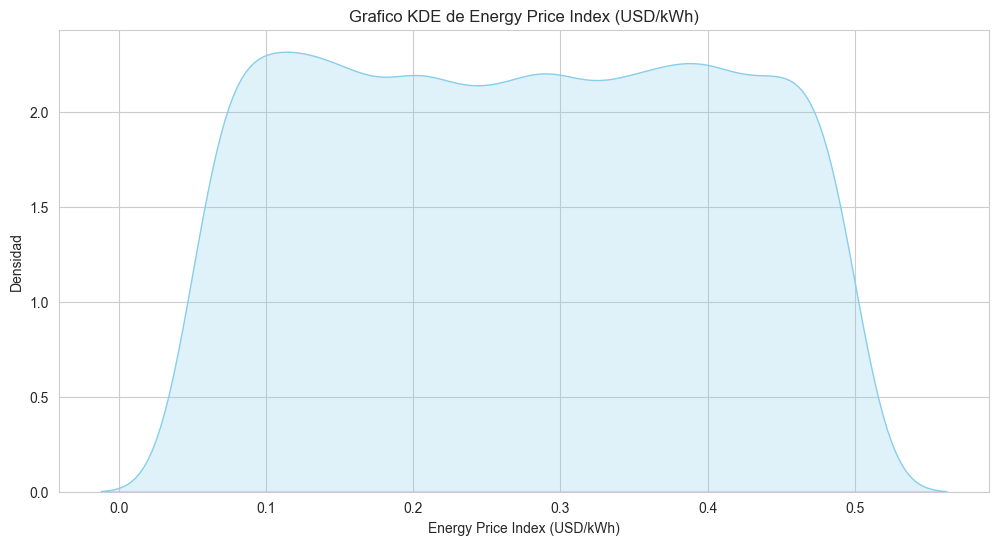

In [25]:
# Gráfico de estimación de densidad de kernel de Energy Price Index (USD/kWh)
viz.crear_grafico_kde(df, 'Energy Price Index (USD/kWh)', 'Energy Price Index (USD/kWh)', 'Densidad')

#### 3.7. Boxplots comparativos por país para todas las variables anteriores

In [26]:
cols = ['Total Energy Consumption (TWh)', 'Per Capita Energy Use (kWh)', 
        'Renewable Energy Share (%)', 'Fossil Fuel Dependency (%)', 
        'Carbon Emissions (Million Tons)', 'Energy Price Index (USD/kWh)']